# Практика № 1. Линейная регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Обучите модель линейной регрессии оценивать  вес человека. Для начала постройте одномерную модель, где в качестве единственного признака будет только вес, который человек сообщил о себе сам. Для обучения линейной модели используейте класс из библиотеки scikit-learn - [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt
U=ds.dropna()

In [5]:
U.describe()

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,65.701657,170.756906,65.679558,168.657459
std,13.425492,8.954609,13.834220,9.394668
min,39.000000,148.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,74.000000,178.000000,74.000000,175.000000
max,119.000000,197.000000,124.000000,200.000000


In [6]:
m=U[U.sex=="M"]
f=U[U.sex=="F"]

(36.0, 125.0)

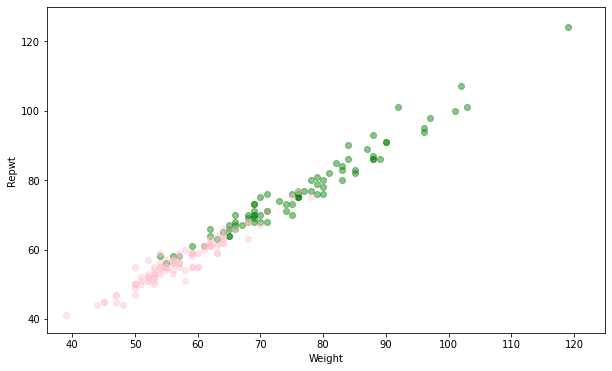

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(m.weight,m.repwt,alpha=0.45,color='green')
plt.scatter(f.weight,f.repwt,alpha=0.4,color='pink')
plt.xlabel("Weight")
plt.ylabel("Repwt")
plt.ylim(36,130)
plt.xlim(36,125)

In [8]:
# Выборка на обучение
x=pd.DataFrame(U.weight)
y=pd.DataFrame(U.repwt)

In [9]:
import math
import numpy as np

In [10]:
xh=np.array(x)
yh=np.array(y)
nx=len(xh)
ny=len(yh)
print("Leng(X)= ",nx, "Leng(Y)= ",ny)

Leng(X)=  181 Leng(Y)=  181


In [11]:
A=-0.98
B=-0.6
k=0
n=len(xh)
for i in range(0,nx):
    h=A+B*xh[i]
    R=np.sum((h-yh[i])**2)
    g1=np.sum(A+B*xh[i]-yh[i])
    g2=np.sum(2*B*(xh[i]**2)-2*xh[i]*yh[i])
print("Шаг ",k)
L=(1/(2*n))*R
gr1=(1/(2*n))*g1
gr2=(1/(2*n))*g2
print("Grad( ",gr1,", ",gr2,") ")
G=math.sqrt((gr1**2)+(gr2**2))
print("A= ",A,"B= ",B,"L(A,B)= ",L)
print("G= ",G)
t=0.05
E=0.005
while G>E:
    k=k+1
    print("Шаг ",k)
    A=A-t*gr1
    B=B-t*gr2
    for i in range(0,n):
        h=A+B*xh[i]
        R=np.sum((h-yh[i])**2)
        g1=np.sum(A+B*xh[i]-yh[i])
        g2=np.sum(2*B*(xh[i]**2)-2*xh[i]*yh[i])
    L=(1/(2*n))*R
    gr1=(1/(2*n))*g1
    gr2=(1/(2*n))*g2
    G=math.sqrt((gr1**2)+(gr2**2))
    print("Grad( ",gr1,", ",gr2,") ")
    print("A= ",A,"; B= ",B,"; L(A,B)= ",L)
    print("Условие: ",G)

Шаг  0
Grad(  -0.35740331491712707 ,  -56.04198895027624 ) 
A=  -0.98 B=  -0.6 L(A,B)=  46.240840883977896
G=  56.04312859425674
Шаг  1
Grad(  0.254153940661152 ,  40.57625774549006 ) 
A=  -0.9621298342541437 ; B=  2.2020994475138123 ; L(A,B)=  23.38310965040044
Условие:  40.5770536985375
Шаг  2
Grad(  -0.1886331471612756 ,  -29.378555677052322 ) 
A=  -0.9748375312872013 ; B=  0.17328656023930922 ; L(A,B)=  12.880852043284222
Условие:  29.37916125647346
Шаг  3
Grad(  0.13196002019152753 ,  21.271048184959703 ) 
A=  -0.9654058739291376 ; B=  1.6422143440919255 ; L(A,B)=  6.303667788279306
Условие:  21.271457503749158
Шаг  4
Grad(  -0.10015942271344594 ,  -15.400944003530212 ) 
A=  -0.972003874938714 ; B=  0.5786619348439404 ; L(A,B)=  3.6315514049012516
Условие:  15.401269691484252
Шаг  5
Grad(  0.06790338608511765 ,  11.150793987086377 ) 
A=  -0.9669959038030417 ; B=  1.348709135020451 ; L(A,B)=  1.6691348827404864
Условие:  11.151000735910815
Шаг  6
Grad(  -0.05377902114774273 ,  -8.0

In [12]:
A

-0.9657028930325252

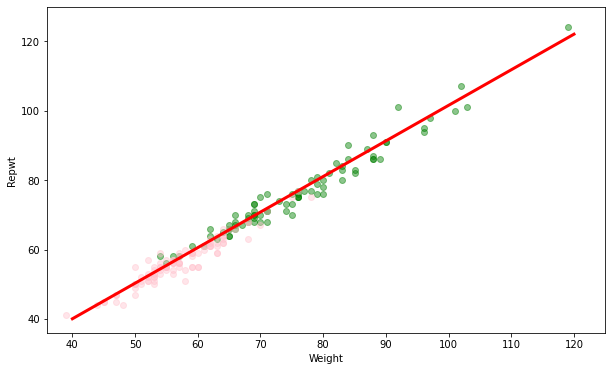

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(m.weight,m.repwt,alpha=0.45,color='green')
plt.scatter(f.weight,f.repwt,alpha=0.4,color='pink')
plt.xlabel("Weight")
plt.ylabel("Repwt")
plt.ylim(36,130)
plt.xlim(36,125)

J=np.linspace(40,120,nx)
plot(J,A+B*J,color='red',linewidth=3)

(36.0, 125.0)

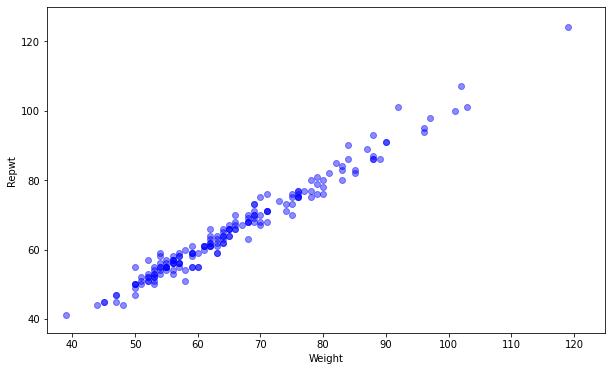

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.45,color='blue')
plt.xlabel("Weight")
plt.ylabel("Repwt")
plt.ylim(36,130)
plt.xlim(36,125)

In [15]:
Regr=LinearRegression()

In [16]:
Regr.fit(x,y)

LinearRegression()

In [17]:
Regr.coef_

array([[1.016145]])

In [18]:
Regr.intercept_

array([-1.08285278])

In [19]:
B-Regr.coef_

array([[0.0090706]])

In [20]:
A-Regr.intercept_

array([0.11714988])

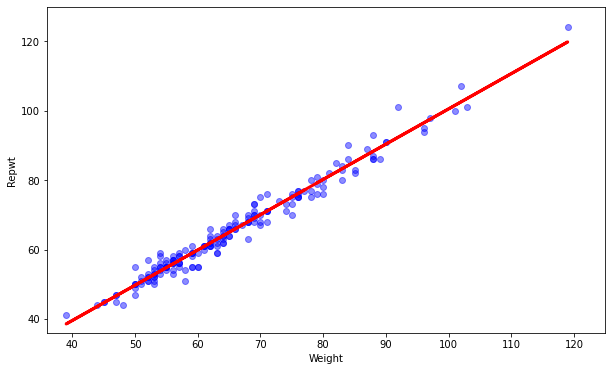

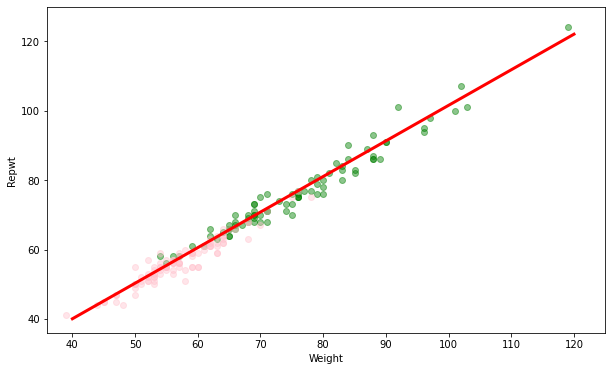

In [21]:

plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.45,color='blue')

plt.plot(x, Regr.predict(x), color='red',linewidth=3)

plt.xlabel("Weight")
plt.ylabel("Repwt")
plt.ylim(36,130)
plt.xlim(36,125)


plt.figure(figsize=(10,6))
plt.scatter(m.weight,m.repwt,alpha=0.45,color='green')
plt.scatter(f.weight,f.repwt,alpha=0.4,color='pink')
plt.xlabel("Weight")
plt.ylabel("Repwt")
plt.ylim(36,130)
plt.xlim(36,125)

J=np.linspace(40,120,nx)
plot(J,A+B*J,color='red',linewidth=3)

In [22]:
# Точность модели (R^2)
Regr.score(x,y)

0.972439161560903

In [23]:
Regr.predict([[52]])

array([[51.75668728]])

In [24]:
Regr.predict([[65]])

array([[64.96657229]])

In [25]:
Regr.predict([[75]])

array([[75.1280223]])

In [26]:
Regr.predict([[60.7]])

array([[60.59714879]])

## Добавим метку "sex" 

In [27]:
cp = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
cp.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [28]:
Ur= cp.dropna()

In [29]:
cp['sex'] = cp['sex'].map(lambda s: {'M': 0, 'F': 1}[s])

In [30]:
cp.head()

,sex,weight,height,repwt,repht
1,0,77,182,77.0,180.0
2,1,58,161,51.0,159.0
3,1,53,161,54.0,158.0
4,0,68,177,70.0,175.0
5,1,59,157,59.0,155.0
